Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

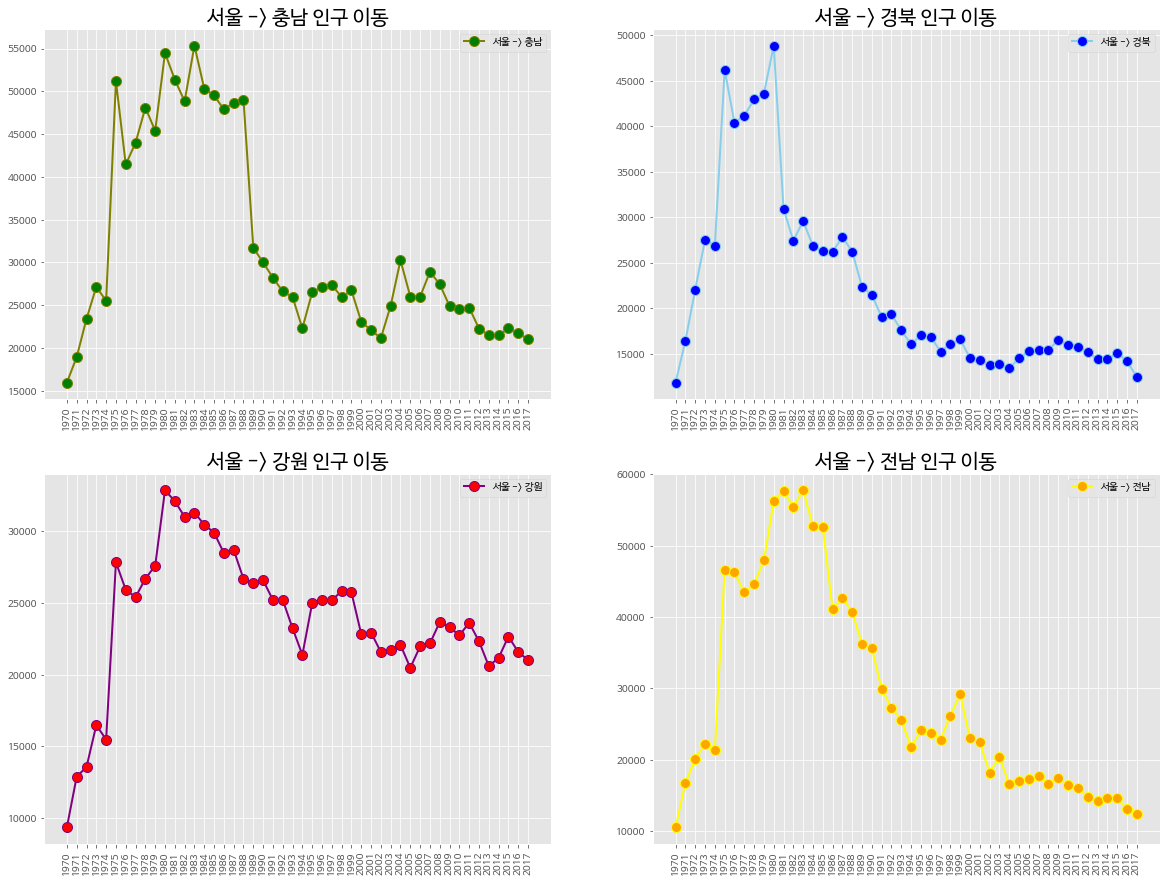

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

file_path = '/content/inoutpeople.xlsx'
df = pd.read_excel(file_path, engine='openpyxl', header=0)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

a1 = df_seoul.loc['충청남도']
a2 = df_seoul.loc['경상북도']
a3 = df_seoul.loc['강원도']
a4 = df_seoul.loc['전라남도']

plt.style.use('ggplot')
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

plt.rc('font', family='NanumBarunGothic')

ax1.plot(a1, marker='o', markerfacecolor='green', color='olive', markersize=10, linewidth=2, label='서울 -> 충남')
ax2.plot(a2, marker='o', markerfacecolor='blue', color='skyblue', markersize=10, linewidth=2, label='서울 -> 경북')
ax3.plot(a3, marker='o', markerfacecolor='red', color='purple', markersize=10, linewidth=2, label='서울 -> 강원')
ax4.plot(a4, marker='o', markerfacecolor='orange', color='yellow', markersize=10, linewidth=2, label='서울 -> 전남')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

ax1.set_xticklabels(a1.index, rotation=90)
ax2.set_xticklabels(a2.index, rotation=90)
ax3.set_xticklabels(a3.index, rotation=90)
ax4.set_xticklabels(a4.index, rotation=90)

ax1.set_title('서울 -> 충남 인구 이동', size=20)
ax2.set_title('서울 -> 경북 인구 이동', size=20)
ax3.set_title('서울 -> 강원 인구 이동', size=20)
ax4.set_title('서울 -> 전남 인구 이동', size=20)


plt.show()